Note:
* We use GPU!
* We use torchvision to download built-in datasets
* We will now use batch gradient descent instead of full gradient descent

## 1: Import Pytorch & required tools

In [1]:
# import required tools
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

## 2: Datasets: train_dataset & test_dataset

In [2]:
# Train dataset
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [8]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

## 3: Create the model

In [9]:
# Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Pytorch don't need final softmax

### Move the model to CUDA GPU

In [10]:
# Move the model to CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

### Data Loader for generating batches: train_loader & test_loader

In [12]:
## Data loader
# Useful because it automatically generates batches in the training loop
# and takes shuffling

batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [13]:
# Checkout out what the data loader does
# maps the values to (0, 1)
# makes the data of shape (batch size, color, height, width)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

## 4: Train the model and find train_losses and test_losses

In [15]:
## Train the model

n_epochs = 10

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # For train_loss
  train_loss = []
  for inputs, targets in train_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    # reshape the input
    inputs = inputs.view(-1, 784)
    # zero the parameter gradients
    optimizer.zero_grad()
    # Forward pass
    outputs = model(inputs)
    loss =  criterion(outputs, targets)
    # Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  # Get train loss and test loss
  train_loss = np.mean(train_loss)  # a little misleading

  # For test_loss
  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    test_loss.append(loss.item())
  
  test_loss = np.mean(test_loss)

  # Save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.4164, Test Loss: 0.2191
Epoch 2/10, Train Loss: 0.1917, Test Loss: 0.1568
Epoch 3/10, Train Loss: 0.1424, Test Loss: 0.1246
Epoch 4/10, Train Loss: 0.1114, Test Loss: 0.1132
Epoch 5/10, Train Loss: 0.0909, Test Loss: 0.0936
Epoch 6/10, Train Loss: 0.0753, Test Loss: 0.0903
Epoch 7/10, Train Loss: 0.0634, Test Loss: 0.0797
Epoch 8/10, Train Loss: 0.0534, Test Loss: 0.0778
Epoch 9/10, Train Loss: 0.0456, Test Loss: 0.0813
Epoch 10/10, Train Loss: 0.0394, Test Loss: 0.0707


In [16]:
train_losses, test_losses

(array([0.41640647, 0.19173946, 0.14237244, 0.11141501, 0.09085693,
        0.07525634, 0.06335115, 0.05335136, 0.04559417, 0.03942932]),
 array([0.21911805, 0.15675446, 0.12459649, 0.11319523, 0.09363947,
        0.0903015 , 0.07973872, 0.07782077, 0.08127822, 0.07072253]))

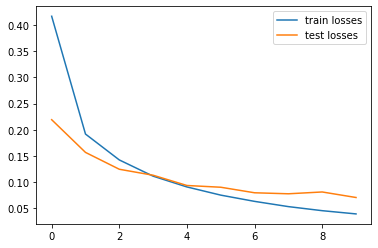

In [17]:
# plot the train_loss  and test_loss per iteration
plt.plot(train_losses, label='train losses')
plt.plot(test_losses, label='test losses')
plt.legend()
plt.show()

### Find train_accuracy & test_accuracy

In [34]:
## Train accuracy & Test accuracy

# For train accuracy
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  #reshape the inputs
  inputs = inputs.view(-1, 784)
  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

# train accuracy
train_acc = n_correct / n_total


# For test accuracy
n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  # reshape the inputs
  inputs = inputs.view(-1, 784)
  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

# test accuracy
test_acc = n_correct / n_total

print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.9935, Test acc: 0.9780


In [35]:
# Confusion Matrix Function
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, format(conf_mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_mat[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

### Plot and evaluate the confusion matrix

Confusion matrix, without normalization
[[ 968    0    1    3    0    2    2    1    1    2]
 [   0 1125    3    0    0    1    2    1    3    0]
 [   4    3 1003    4    2    0    2    5    8    1]
 [   0    0    3  994    0    2    0    3    4    4]
 [   0    0    3    0  960    0    6    2    1   10]
 [   2    1    0    9    1  868    5    0    5    1]
 [   6    3    0    1    4    4  937    0    3    0]
 [   0    7    9    6    2    1    0  997    1    5]
 [   1    0    1    5    4    3    3    2  952    3]
 [   1    5    0    6    9    3    1    6    2  976]]


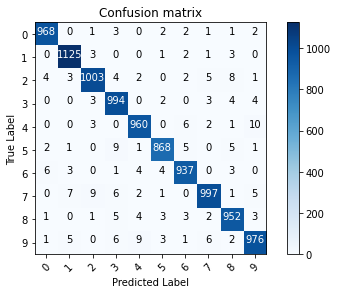

In [36]:
# get all prediction in an array and plot confusion matrix

X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
pred_test = []
for inputs, targets in test_loader:
  # Move data to GPU
  inputs = inputs.to(device)

  # Reshape the inputs
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)

  # Update pred_test
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))


conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(10)))

## 5: Model prediction of True-Classified and Misclassified example

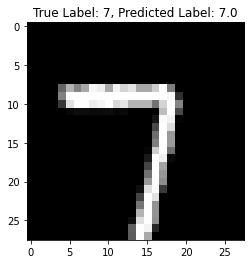

In [37]:
# Show true-classified example
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s, Predicted Label: %s" % (y_test[i], pred_test[i]));

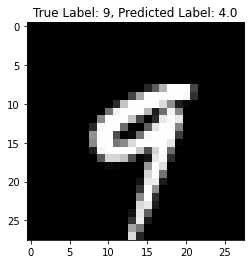

In [45]:
# Show misclassified example
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s, Predicted Label: %s" % (y_test[i], pred_test[i]));